In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image

from wordcloud import WordCloud

#import warnings
#warnings.filterwarnings(action='ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/imaterialist-fashion-2019-FGVC6/label_descriptions.json
/kaggle/input/imaterialist-fashion-2019-FGVC6/train.csv
/kaggle/input/imaterialist-fashion-2019-FGVC6/sample_submission.csv
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/2e279590988cb29535739095a188cd0b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/5a750b28f42a2fe9e480725edb0447db.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/cdd27e07ef7ddf8d413bb13936241ac4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/a6f3960744c8db184ecb0f6112b7988e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/1c929f3b53b9e67dbf5986309a244aaa.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/3a363533069e4150d6fd215abb73dd08.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/18b2f32e876170304b2b6860ae127ba5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/65c0ca5772b227a356c95910354278e0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/8552ba7fcd321cb2677612ae5cab94c3.jpg
/kaggle/input/

/kaggle/input/imaterialist-fashion-2019-FGVC6/test/55b683f5bb5508aff62ddb34f8c9b05b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/bfcec371ff34fe251574364b801617f0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/828516200bbfe2536ab9545749cce871.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/fe36df2687aeea8690f934ac1aef9354.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/97431c84addb6dffd10e60658cbf00b8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/079316c57596d9c170b1fa3964ddaa6c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/3d1a8d1323ab2feae0530606f883e2c7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/acdb09be169f3ac40728c8590a66e6c6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/16b7202138bdbb600ee49eadfe63f5f6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/08269ba6f7c1fffd539fc3c016b771e6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/ac251d77cc42ec66b128c80048e10bef.jpg
/kaggle/input/imaterialist-fashi

/kaggle/input/imaterialist-fashion-2019-FGVC6/test/18c0e9262037120fc1820f5a2fed264b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/a3cbb86c598b433105d29f84039bd832.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/ac4aa8f399c1cf0440c03a13bb571660.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/6450c32bf9c7f43d91c52ba51e636e47.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/5abd76c03bfe9417a51ef66b920e6ad9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/ff6ecec6b934307cec3fb492c9e6a990.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/0e4af4261e722e382d3999857e51870c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/473f5ab130db24c12058ad0717e8079d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/488d950965993b643ae18323acacc9d0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/88383c53ef2404f1596e41e45ebe5ddd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/test/7c94f74b4a0fc9be0dc73512da18ddd5.jpg
/kaggle/input/imaterialist-fashi

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c5c6f2b0e849ed43d3f86f8496f4f7b2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c0ee8a7dbd9172dbe5e48f4f4f7e9867.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e76c4ddd230ae7489647a22d12aa7457.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9d7b9379cc0f5a6e7b113c55889a559c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/20b557a90b02edbaa641fed175322875.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4e4e0817247b7740b6f08f2a71e88b6d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/17e7ce0708f2de574e412a6d01e6035f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/76b51fdb71d8c34a9aaff3b18f337f37.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b95c84de6c3631407613da2a8fc58057.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/011f982a18f986585c1941057109f570.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3d63f16264128b21fc92d721f0d7e7cb.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/cfe6633a7f0518a7aa640aa2998e8032.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/60648c306bec83a96f4de05f887b03db.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e1230da9f3d661989c3c473bed63a294.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ed183e13f1da838f10289da493286358.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/eb396372a0cbb497fcb259ecf9859fab.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a630bc50ec375af4d98e38ae82cd9bb1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0f6fb0ea49fdf2e520b32559580317a8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f72a254e0142a25852937f68f91eeff0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7383c8a282207e823d1bbbfc1898c2c9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7944f432e5590b0277b0a70d7988dab0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/cc334d5c9fc51c528f710d3052ddf07b.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a52265a0f67e2570f8a3bda103f02dd6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0ee399221abcddb479514c342040dd5f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f99d11e12a1458fea492cafb572729cc.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0320ead69711c7e6956a3edf451b5dea.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5f2fb747eab3ec656600218990fc1cbc.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5a7b346bf50d3f8ef7e2d00028f9dd78.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b5b7620c6c08d2839ccc46e28be5ff3b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3ed09d3f4fc20ba78c6960567ecfcb31.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/845af8bfab795bd9a73ddb4a23315440.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/dc9c471936cd02064a59ac31de23b026.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/176e7c65664ea7233bd449388549729a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/65401cc6d24d4532cc2632ae8fe87dd1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e9e395951ba5901de8ba2b15899689ee.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e8d62cff44d4c5d304733f4019c150eb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/483f5d5b4b6ed09d914c3fba718dcf2d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/43e0cd95c91d8d6a6a4023aa170f3958.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/706dc8ebe32c4327fa0bf2441075a6be.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2aa160207df1892bfce8b7d5e20c2814.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1dbbec54f94fcde0bbc088f79b3f37a1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/090240db4434799997d06c0bdeebce88.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3a90e8ae348480152ebf11322eced2cd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c2e5b9b3dd8f6b6d1f97c8711bd5912d.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/66eaea62b60752d229c6b016d330a986.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e9f3e5c4c1f789cf1dfadbffe89f76d2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/bbab82f20344974b50868180f2a75dc7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/34e13b1406bc583949ad9e7c096351fb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d4302f880b891d7fcbce4217f66b1b3c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1cb4ef137213a9284ddf2dbce5b3b677.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2a79c4e6e5951677ec17da8f72ae033f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c70097788d3f0e508f6b4ca7e5725db6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/34063635425709876f0cf2525aadac13.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c3c2e7a933070a01664ab30462b4c351.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2b0ce90c4615726ce5f92d18a48e2df2.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/582cb2eb46a88b23950fd44ec0639e98.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4a173cdafd955f680972463e7b17c4ba.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e590174a4592bf7a5aff7642c8ebcdc4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9de1c2ecccf482cee64a7297a9282707.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/572a530815b4020c8e465926c37c1bdd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d83cabe43f9a57d1a67b191d452829fa.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/308768e2bfdef3e4c612eb745d37d9b4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1455b7e17c35ed73637e4997fcd9d1ec.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/01292ba969dec3997458fe89fbfa0d2f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7d4709e5dc5eb48d3c81690bfd783b1d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/78df6618bde3fc855bd265910b0c7094.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b653e973f86f8db33e1e1d84c8c69cda.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8e1bf85cce2bd479accbc5066b898010.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/56bebc8e12e5e33a49a7af83378dfedd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d9affe4b3282ff6ef48f1a4f3f4bb8f8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/96ec337bad6625cb4513859570400db0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/6a2ee772ed7713563423e4b9b962af88.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1b1888dddbd6af553f7556b4dceac22b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3e2e6eb3dec4123fb66d191dd6c50dcb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/207745b42e2015af3f86326e0ed8c3bb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0d02a85a23473efa381b3cc2bb3e50d3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/eaa58d9601f39c0f0822ae672a3f58b5.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5da341aa90229e64e126e9f392b323f3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4f3b81ce6d1df58c97951ab031b737da.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c0a2326eef4b24c97e1c567200ea6e34.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9738e9d1e39882f8d28f938bf05ad50f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/110310dcb0884b31a0e438f41bdfad2e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/63eae454bd97f462e2ebd04d524603ad.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5c47e70237cafecb644d33c6ea45cd03.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/258476161ff5a6b34ee94191e5b65959.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b59cda633ed6197fefac3eec2cbdd6df.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/94c8c58a76caf40e904c39dd013da39f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0b7cae44b9f9edc7d5796f63fd899b75.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/141290f02a08b604ac2230b1b85759a6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2db8150211e0497ae6d5c292bb050fc8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/6f11d8f24faeb0d22f523a890b4759cd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3841be078f02fecfab81b0156c187982.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/817da3722c6128083e4f1481a77332ce.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7de75797f8a601322e93cba44f535182.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f4fe1ba40065807edb72c03485dff3d2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a9c535c16f592b80339486837e3f0748.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3e6eb6fde74938461a27ca93f3fa1d60.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/71b0ce89789b8b0d67a6f77798f28d18.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d7c1887ebc23d01f7d57dc67c037a61c.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/dc4574fa5b6f7332dbd4858ca8b1702d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c7fefe115ba7d26408e8c1418e216816.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4070d91b983f34d1d8d0c8a35fc80683.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d8b06d5a4cfcd70c0ff64982eb7b5220.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/82f05172f2d1023239731ccf62458118.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8f01976842a845e96749dc911cdafd68.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e751524baa101370b154876e37014b1b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/317ad6720b44d890c85208a0d6fdfd36.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ddd880d190a45f276d49db0fee01cd24.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/66e65470053a1494f939821a74c1ce29.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d97d0ca8efc2811c6820224f85b6441a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9a3ab749125d2d95069ecb9c60d1acd7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/82c9aaeffcecc96b26116ad13da6f069.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c71d2c32af4d9a968e8b5956537bb234.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7eb810756fdb8d7f7956b8b4990349d2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7ad613dc0a0bb3fd60602ddde2963c68.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9b475a56ceb1e1f26306544a0d224ba0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/98e44ce8f83bb82b9118d1003d194551.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/462b61feedd7b23690a712b6a0fddf83.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9a5c0a29a86c8f2f85676f1f3fcdd50a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7066b0876f77cc7a585606acd9794c39.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/96e0519694b90b1021218fe309bb147f.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c77d389989246069d47904bfef9317e3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/27d6fce55ff0cad3afe6b4260a25bb8e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e66f046a39aa9169daa36fe3f45a61ad.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/679dafcd2ec04a089395d0ac577a7b2b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ceafad0971ee0328ecbfb082a8899434.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ed4b8c22432181c5a6987db1e00bbdd3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/231e6ad5408938ab7097f58f836227a2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/220c51d837035efc248adcccb81bbc41.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/df7d2c5a5e1a9117bfcd4819ce5a6d7d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b0b5e8e1a30860e912027e138d360a5c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9cdc715bac715c215fc35245bc663749.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f51382b3ad478055f39e9aeca7e948b5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/28b4385de02356d0d9a1af6e9fc17038.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/af5fae7055f69efdc540250d0ea50cfd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2d6e3a9a53039686f96e4fcd4ee34e08.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a97409b99e73c82e67de0cb51c4e7520.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f6beef4a939b084b701f115abc5e2523.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c0a4a4c9ccc4e35eb3b2578315be4151.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/02333b8ae3ade978a83cc823f143696d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ffdc587a4b41cc4ff12c56e4fe06086b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5227dc58247ee256a101ec58db8262d2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7414b834d69507f9e68d10f20384bd3a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ec27ca63aa2309ccb8fdac2a0e9bdc6f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/439612545f3d47a9631ed7f3f7bb3ece.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e6c9e1d6472864ac275565225d58dc01.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/855529b3b06dcd601bcc766ba6019344.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b56e3249c78ba8dd0a1f6a17b17edfbf.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/97240e9049412660adec0e33d4d99f7f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a03bbf9107f7d152ee656c370cd08ef2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/19de46a8dcaddbd6cc72e2786c8c16bd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/bf9c78b64949280ec3f6c539479202c6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9385a8a4607481cbb89d49e0d2107993.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b54d8bf014f93b6184fcc96046eb090a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ab3336508bbcceea810d6984312ed24d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a0daa8c3bb4fe2d718656887c1911fa2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c22acc3cbed9bb03dec0674bd1d3c5bd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3a4d438d22e5328eb4603599f98632f0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b5cd9048356687f702b58d53713bdff3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a69f8d36fd6900b474ee5af0629919ff.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d845a7b11ab35bb8e8321ec55d260a33.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/aef0ad7b1855a129c92b451e058fdc81.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/6971b5f285fa73ca7c3f991dfb922523.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ce8258e226a30dd71a9b74ad45abf020.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2a9c2c49327788920db3257eece9eadb.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/66bafe586a20a77aa1734e1ff164d1d1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/71fe5cc3bdfb30a61ceef9a9d8bfa8f9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7d8d5a7208b66ae501e15efa1867a8e3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/178768273f160c8c532b08913fd01bf4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/905e197302cc77819609cf2922609ec0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/875bd1dcfa35c65b3847db5d786be95f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1770fe539dc3b0e5cd24ec3c7e103e98.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b058e7da44c40e467c6ecf761708fda8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1283de25d2a5c700a6ced1d2b0776e0f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/20b8be7aecf95b1e7e5b62cc56ed19f6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/bf01b79d64530e400636d6ef26e4fb1b.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/be073b1dea456e8826713bd44ec6ce3f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5c929cecde984739c5eb05bbfcfcbe65.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/158efc68b312142b53bfe3d3f5347a8d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/af5f6c03321312b92644cce693d45a98.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5ac709f7aa8d6b70821586edb7e3dbd8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9eb2f1b83c3f9ae983afeea95bd5e7f9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/914c055ae4dd42be02b37805921451ed.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2e591febf5bfd11d1d47ca8c8f21fe7b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/89382f800298aafcbf9becaa1f7bb300.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d3a7dd061c95c9b9b9df1f4b2e7e271d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3ad16e1aaf9be827168156eff6063d91.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/69fe206590ca01cce29441f3a58c0eda.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/305d1eb2f70ab57bbde0315fb41290b0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a493b374a51eca0f5525abf7169dcf9d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/00291c7acf9ec38b6335f805ddb4beb9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/543b758d140dcc4150c627f68b2399f8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0aa55eac7d3adef2b957cb0f4ffa0363.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/698a997b9c0593c64366afc34bab5a2c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/77f50f4846abbf4d5f1122404fbb7140.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0cfecd0150372e682629ed1b0ca716ad.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/210b4551038c85719fcaa67cb6cc90ba.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/338e9ecbf74515843c4917bb19462a79.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7a18bebdfc29660a2dfe8910b9fae3b2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7b0010e40c7db36ece2dc08fa5734a06.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9f80000b676d5b2c85860c671dfbcc2a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5f4f1d4ecd70598d1d05a06e416b00f2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1706b0a4093565cd0acdcf7be4dd6ba0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/457f5d4051e00dc362780b8ddaf5c9d5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3e0453f58ec4d7d93e819b74138dbdd9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/559d569e6b04b4f9838ad58ea01d8f4f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/aa6305db08d3efb0d0faccd6ab8e8878.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ea1dfa5168c498f3e5a2f017fe81c057.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3e058de4b9e5120d83d26effa1be356c.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3f8235cf26ec4ac86edab25d1205c087.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/86368a7b13f9bd56b5edbd1a2b31c1a5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a477c8d21a42e4789a534359c3f1567f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9f255f3fb8b2b1ede7976b9fd7fa0600.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/40b4e261ad11571331eb5a2d4ec19567.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7b2727a27efa82786432bffc5abe05b6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f7c1bb3e4a80c5439362b6634231a3ae.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0e1a9b6c8ef1a3f818302060c0d23935.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/287ada3a0de13e390dab8048b4e96ca8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d27d1e578602f948c3a43be6ad90ede5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/fdc00eac708506181cc0b3018d217b97.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8f14a999fdb4a3e1c0699e8860bc87ea.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/de9f7bca6b0b0b068543a82f59d36485.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9ae3842d61bdc3713623a175a210c52b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e8b9baa123b77c913c7f4642dad47298.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0489dbfb25fa8ee847447eb6a1cb7066.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/86dd57e53ffabcb036ae4ac853df8114.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3ecc69eef2483e64e747906508b456d7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c952f6ac618e42e346e49e52a4fe4909.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a1b572932e4b865a90e631bb39d4eb3d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9ed7ec3047f38c3ac5bf81dbfcc1c012.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2943ce54b89c1f6087b5c9c58d0c23d1.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/cd5ef738e8341d16802eee2e28f71c5d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/42746e68a9fd202dc2bd68af3100375f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b23ab811ebb67b602852d759d9a525a2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/389d65dec1bdfdd13d7cea08f6191eba.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8bf2de9de9b745c596dd9aa73a57a090.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/7a13257ce62357e30bf37fff97c61587.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0cd8b9f6141bca7b6b3e1d9a9197aea6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/65f23486fa311f8f0abc6ec88fec3919.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/9e8e74016872321e99f021bc970bda51.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e3f91eca188999035669d2170db656f9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2b18a36687dc9d8b1da5f9370bd825f2.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e3d57b44c4dd0c7af146bae077f0d17b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d86d82e9ff14cadbcee657d7b944cfb3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d8ba37e0cc17032858c5839df34db628.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ef799f1091458a0ad3f100eb2f04ca4f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5a573d6d52ea4be7577b3d6f4b37cc0b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1bee8d9eea0e16d81fc1ae765b3131b9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/60fdf8c95953dfb915445fcc5712da3d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b2b13159cc73850b2219af80d52c48bb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/27d30ab725351d78717fca5367fef34d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1c670cd81783fc97beeb3528f24867f1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8e63a9741b5f94b30df5c1518276f824.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e13170c4b8becc0b1d33c8faba9a92ab.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/38c1ddc6b506b91a0074f68ea2d98c74.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5114d541929484f0af4c7c17a7cd5467.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/25ef24297f9c463af1bf6ce5dd8ec063.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1dea34ae08342174a9aee521f8abc6a8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c7a6197ca56942f2b95970848d0fb71e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/54b0a3384849bf74adb5bfcabc237cf4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4fd75cac2d875da692eddb50fc7254bf.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/62c9ccdbdc75a510c808510872f0f553.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/6ee6f2d47970aecee2524066acf3a35f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/58590d227f268e9ccb5ab5431d14662d.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5708035299b8ecaf24c049a2bcf9d669.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2146b1d5e4e073854bcfa3b82b703ca6.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/ecccd71dee7977095511ae0e6e2f3b7c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/38f8cd1e2034ac2c34d0bb2c3a4cc674.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1a645e05941abfeb5cceb6e6949d1ae8.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d7a84a067db1e8dd0496b97543e88aa3.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/aac86b231e7f5d51a56dbb63b5e434cb.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a0786bd37640c4ddc7f32a9a83481850.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8316c9befda69f6a8d778d63526885b2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4c07f0a2b793976bc6cbc2d32230ceb5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d0f9ac3020283b244664c6feed91e69f.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/981591ce10ad7079affda8a73113ec0d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/33476f6b8640e5327b8e92d63ba0668e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e5451be7c2bacb4ebf7f34cf6683bcf4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/cce397c491c12874e38aeb6b90df2d53.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a924cd4a1793281f3f04c9d3776c456a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/178cbc1884f23285a370fc18b3a63b6a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/bf32e74aacd779318c07c1e5f174fa00.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/bfb8913da391e9270d1ef75e5e04488b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/46730687162e5fb8f203014c72a8510d.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8239f4ce207944fd863bdd8afd55c45f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/195d575bfb98629d432f981a6c59457a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/476e4e97ea038261d362f2aac01bd51c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d71526c843c906e657c53a010da388ff.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5c9bfee947a24550ef8a75c7e5f6c8e7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/43ec72ec3836f73f3f3f00186d0db581.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/620d2bf9101a473eb064a19fe4ead36c.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/876b4ce39127beeaf28c059b825d5d88.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/da5bce1a954765828688bf1a6eae2b1b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4bc6b421053f8b6b09ef1855635d099e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c317b9d2c12c9d782b3d2ed69e4b4379.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b803982395d6ffed5f6da8dd71e154f1.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/295220f0a0f777fcc94829be18e8ac62.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0ac2e9f337dfd229edbb86c9b62dd139.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a66eb37effdfa0803716946496e18016.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/63bb106e8d84aa4342a6a56004821db5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/fd31306dc962d677b836251aa3ce0a50.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/138c20b4cd9096747d966d69d9139f00.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e5113e589098fbb9806ddf152a3cfccf.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/0e131bc951e57035485e69d8b80a1ad2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3038e459aa8b1d417e669af3da31f036.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/b0741af699641d81833dab6475f20dfe.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c3b7439f68ad93cc9f9b623968b07f56.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/82021ed11a4c3df393e1aa516a931721.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/f0445c4671cbf87f6be472f5102475c2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a376314664c4d916c4ad433719334c51.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/161e6c715d2a37d029e0dce9be6eacb5.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a2ad777a7dbc9094571f06a937798d40.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/246dd851b8b5cc33b388b99f8ab2efb0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a9cfa5673764571f70247cfb3f3e3d5e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/4710e0c5f82d624d3022e66b0fd5e859.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/006588bfc246a67c7d3afdf5201a26d2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/1b11fe26ac436799a56a0fdc080d07a2.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/8c5ffa8c43de67e180c1a2bcf5a10fb4.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/cc076c39504221b9e528b18e08bec34a.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/749b5437a212d29ebe1c55e977bdc972.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/923e9949d35ae5499ce828631ec45df7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/89bd610848d5746922c011c14f4efee9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/a88003dd07073d72bb8140045c14749e.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3940e1d5fd09ed747896c9155e69f0de.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/3586e21550d7657c04c066aafada185a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/d5798ebc717eaaa6c0ae111672f329f7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/de926e59a9017d0035a77c3f1c32e55f.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/63999291c4c45d69002cbd064624def9.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e53efe8d07c6834366d66d8cbbb571a7.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/07d366fa63a23040791e5329ce15a724.jpg
/kaggle/input/imateri

/kaggle/input/imaterialist-fashion-2019-FGVC6/train/5fa5facb505887da96c5e080fd17d170.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/368544126db25c9af26d9e4df56c3d49.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/6c54103073f5d0254f303c7dcfc891dd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/11175f44571eb50c33381c9259b59213.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/e700f5a59fd72aec082508d6edb1b22a.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/86cd74a4650962e79b5e0d1e0d0a5eb0.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/2a24074f9c1ef4cb06a9fb2a136c0c58.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/fd68e0d71b805c44a1a7b9a2dfb2124b.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/53aaaa8e27072e7733167428ec3c0afd.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/09dc3832ada1955d51ac8c3895437f20.jpg
/kaggle/input/imaterialist-fashion-2019-FGVC6/train/c3e94c061d8ba2fbe41e5fdd65922a37.jpg
/kaggle/input/imateri

In [18]:
#import pandas as pd
path = '/kaggle/input/imaterialist-fashion-2019-FGVC6/'
train_df = pd.read_csv('/kaggle/input/imaterialist-fashion-2019-FGVC6/train.csv')
train_df.head()

ImageId  \
0  00000663ed1ff0c4e0132b9b9ac53f6e.jpg   
1  00000663ed1ff0c4e0132b9b9ac53f6e.jpg   
2  00000663ed1ff0c4e0132b9b9ac53f6e.jpg   
3  00000663ed1ff0c4e0132b9b9ac53f6e.jpg   
4  00000663ed1ff0c4e0132b9b9ac53f6e.jpg   

                                       EncodedPixels  Height  Width ClassId  
0  6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676       6  
1  6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676       0  
2  8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676      28  
3  12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676      31  
4  10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676      32

In [19]:
label_description = open(path + 'label_descriptions.json').read()
label_description = json.loads(label_description)
label_description.keys()

dict_keys(['info', 'categories', 'attributes'])

In [20]:
label_description_info = label_description['info']
label_description_categories = pd.DataFrame(label_description['categories'])
label_description_attributes = pd.DataFrame(label_description['attributes'])

In [22]:
label_description_categories

id                                     name   supercategory  level
0    0                            shirt, blouse       upperbody      2
1    1                 top, t-shirt, sweatshirt       upperbody      2
2    2                                  sweater       upperbody      2
3    3                                 cardigan       upperbody      2
4    4                                   jacket       upperbody      2
5    5                                     vest       upperbody      2
6    6                                    pants       lowerbody      2
7    7                                   shorts       lowerbody      2
8    8                                    skirt       lowerbody      2
9    9                                     coat       wholebody      2
10  10                                    dress       wholebody      2
11  11                                 jumpsuit       wholebody      2
12  12                                     cape       wholebody      2
13  13                                  glasses            head      2
14  14                                      hat            head      2
15  15  headband, head covering, hair accessory            head      2
16  16                                      tie            neck      2
17  17                                    glove  arms and hands      2
18  18                                    watch  arms and hands      2
19  19                                     belt           waist      2
20  20                               leg warmer   legs and feet      2
21  21                        tights, stockings   legs and feet      2
22  22                                     sock   legs and feet      2
23  23                                     shoe   legs and feet      2
24  24                              bag, wallet          others      2
25  25                                    scarf          others      2
26  26                                 umbrella          others      2
27  27                                     hood   garment parts      2
28  28                                   collar   garment parts      2
29  29                                    lapel   garment parts      2
30  30                                epaulette   garment parts      2
31  31                                   sleeve   garment parts      2
32  32                                   pocket   garment parts      2
33  33                                 neckline   garment parts      2
34  34                                   buckle        closures      2
35  35                                   zipper        closures      2
36  36                                 applique     decorations      2
37  37                                     bead     decorations      2
38  38                                      bow     decorations      2
39  39                                   flower     decorations      2
40  40                                   fringe     decorations      2
41  41                                   ribbon     decorations      2
42  42                                    rivet     decorations      2
43  43                                   ruffle     decorations      2
44  44                                   sequin     decorations      2
45  45                                   tassel     decorations      2

In [24]:
label_description_attributes

id                     name supercategory  level
0    0   above-the-hip (length)        length      1
1    1             hip (length)        length      1
2    2           micro (length)        length      1
3    3            mini (length)        length      1
4    4  above-the-knee (length)        length      1
..  ..                      ...           ...    ...
87  87               high waist     waistline      1
88  88             normal waist     waistline      1
89  89                low waist     waistline      1
90  90       basque (wasitline)     waistline      1
91  91             no waistline     waistline      1

[92 rows x 4 columns]

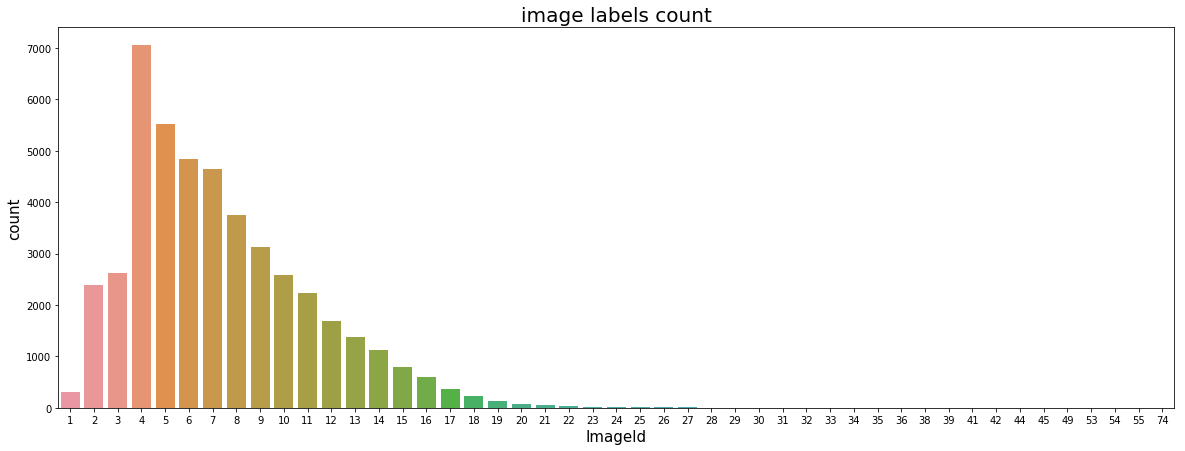

In [25]:
train_df_ImageId_count = train_df['ImageId'].value_counts()
plt.figure(figsize=(20, 7))
plt.title('image labels count', size=20)
plt.xlabel('', size=15);plt.ylabel('', size=15);
sns.countplot(train_df_ImageId_count)
plt.show()


In [26]:
train_classid = pd.DataFrame({'ClassId':train_df['ClassId'].apply(lambda x: x[:2].replace('_', ''))})
label_merge = label_description_categories[['id', 'name']].astype(str).astype(object)

In [27]:
train_df_name = train_classid.merge(label_merge, left_on='ClassId', right_on='id', how='left')
sum1 = train_df_name.shape[0]
ratio1 = np.round(train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'})/sum1 * 100, 2)

In [28]:
train_df_name_stat = train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'}).reset_index()
train_df_name_stat['ratio(%)'] = ratio1.values
train_df_name_stat

ClassId                                     name  count  ratio(%)
0       31                                   sleeve  59452     17.83
1       23                                     shoe  46374     13.91
2       33                                 neckline  34260     10.28
3       32                                   pocket  27179      8.15
4       10                                    dress  18739      5.62
5        1                 top, t-shirt, sweatshirt  16550      4.96
6        6                                    pants  12415      3.72
7       28                                   collar  10160      3.05
8       35                                   zipper   7994      2.40
9        4                                   jacket   7833      2.35
10      24                              bag, wallet   7217      2.16
11      19                                     belt   6851      2.05
12       0                            shirt, blouse   6161      1.85
13      29                                    lapel   5972      1.79
14      37                                     bead   5084      1.52
15       8                                    skirt   5046      1.51
16      42                                    rivet   4893      1.47
17      13                                  glasses   4855      1.46
18      21                        tights, stockings   4326      1.30
19      36                                 applique   3529      1.06
20      15  headband, head covering, hair accessory   3470      1.04
21      18                                    watch   3389      1.02
22      34                                   buckle   3300      0.99
23       9                                     coat   3124      0.94
24       7                                   shorts   2756      0.83
25      22                                     sock   2582      0.77
26      14                                      hat   2518      0.76
27      43                                   ruffle   2407      0.72
28       2                                  sweater   1494      0.45
29      16                                      tie   1457      0.44
30      17                                    glove   1385      0.42
31      25                                    scarf   1374      0.41
32      39                                   flower   1367      0.41
33      27                                     hood   1226      0.37
34       3                                 cardigan   1107      0.33
35      44                                   sequin    929      0.28
36      11                                 jumpsuit    922      0.28
37      30                                epaulette    874      0.26
38       5                                     vest    720      0.22
39      40                                   fringe    588      0.18
40      38                                      bow    528      0.16
41      45                                   tassel    335      0.10
42      41                                   ribbon    274      0.08
43      12                                     cape    152      0.05
44      26                                 umbrella    135      0.04
45      20                               leg warmer    112      0.03

In [29]:
train_classid = pd.DataFrame({'ClassId':[j for i in train_df['ClassId'][train_df['ClassId'].apply(lambda x: '_' in x)].apply(lambda x: x.split('_')[1:]) for j in i]})
label_merge = label_description_attributes[['id', 'name']].astype(str).astype(object)

In [30]:
train_df_name = train_classid.merge(label_merge, left_on='ClassId', right_on='id', how='left')
sum1 = train_df_name.shape[0]
ratio1 = np.round(train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'})/sum1 * 100, 3)

In [31]:
train_df_name_stat = train_df_name.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'}).reset_index()
train_df_name_stat['ratio(%)'] = ratio1.values
train_df_name_stat

ClassId                                name  count  ratio(%)
0       20                         symmetrical  10773    15.018
1       61                     plain (pattern)   8719    12.155
2       60  no special manufacturing technique   6396     8.917
3       41                       regular (fit)   3676     5.125
4       88                        normal waist   3569     4.975
..     ...                                 ...    ...       ...
87      74               herringbone (pattern)     10     0.014
88      76                              argyle      9     0.013
89      21                              peplum      9     0.013
90      80                             peacock      7     0.010
91      44                             burnout      3     0.004

[92 rows x 4 columns]

In [33]:
sub = pd.read_csv(path + 'sample_submission.csv')
print('The number of training image is {}.'.format(len(os.listdir(path + 'train'))))
print('train data unique length is {}.\n'.format(len(np.unique(train_df['ImageId']))))
print('The number of test image is {}.'.format(len(os.listdir(path + 'test'))))
print('test data unique length is {}.'.format(len(np.unique(sub['ImageId']))))

The number of training image is 45625.
train data unique length is 45625.

The number of test image is 3200.
test data unique length is 3200.


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


minimum area picture 
Height : 304.0 
Width : 236.0


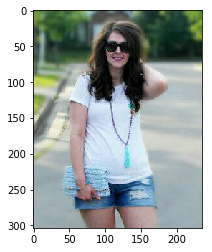

In [34]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Height'] * train_df.groupby('ImageId').mean()['Width'])
print('minimum area picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


maximum area picture 
Height : 6824.0 
Width : 10717.0


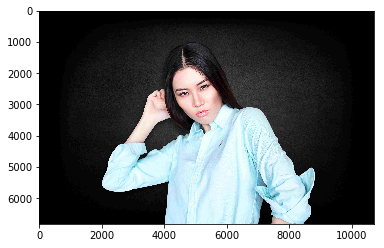

In [35]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Height'] * train_df.groupby('ImageId').mean()['Width'])
print('maximum area picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

minimum height picture 
Height : 296.0 
Width : 331.0


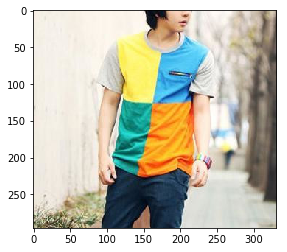

In [36]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Height'])
print('minimum height picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

maximum height picture 
Height : 8688.0 
Width : 5792.0


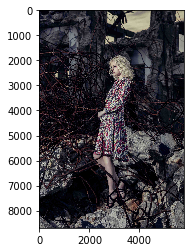

In [37]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Height'])
print('maximum height picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

minimum width picture 
Height : 499.0 
Width : 151.0


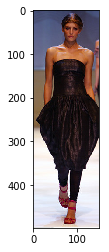

In [38]:
img_name = np.argmin(train_df.groupby('ImageId').mean()['Width'])
print('minimum width picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()

In [ ]:
img_name = np.argmax(train_df.groupby('ImageId').mean()['Width'])
print('maximum width picture \nHeight : {} \nWidth : {}'.format(train_df.loc[train_df['ImageId'] == img_name, 'Height'].mean(), train_df.loc[train_df['ImageId'] == img_name, 'Width'].mean()))
img = np.asarray(Image.open(path + "train/" + img_name))
plt.imshow(img)
plt.show()